Importing Python packages

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import load_iris
from sklearn import tree
from Utils.preprocessing import *


plt.rcParams.update({
    'font.size': 16,
    'axes.linewidth': 2,
    'axes.titlesize': 20,
    'axes.edgecolor': 'black',
    'axes.labelsize': 20,
    'axes.grid': True,
    'lines.linewidth': 1.5,
    'lines.markersize': 3,
    'figure.figsize': (15, 6),
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'font.family': 'Arial',
    'legend.fontsize': 13,
    'legend.framealpha': 1,
    'legend.edgecolor': 'black',
    'legend.shadow': False,
    'legend.fancybox': True,
    'legend.frameon': True,
})

Importing datasets

In [14]:
path = './Datasets/Training/Large'
file_names = get_file_names(folder_path=path)

File names:  ['Sample35.csv', 'Sample44.csv', 'Sample39.csv', 'Sample43.csv', 'Sample36.csv', 'Sample38.csv', 'Sample33.csv', 'Sample42.csv', 'Sample40.csv', 'Sample37.csv', 'Sample34.csv', 'Sample41.csv']
Number of files:  12


Reading all large training datasets

In [13]:
large_dataframes = []
for file in file_names:
    large_dataframes.append(pd.read_csv(path + '/' + file,encoding='utf-8'))


In [28]:
def plot_flowRatebyTime(dataframes, nrows, ncols):
    fig, ax = plt.subplots(nrows = nrows, ncols=ncols,figsize=(16, 16),tight_layout=True, sharey=True, sharex=True)
    ax = ax.reshape((nrows*ncols,))

    for i in range(len(dataframes)):
        sns.scatterplot(data= dataframes[i], x='Time(s)', y='Flow_Rate(ml/m)', ax=ax[i], legend=False)
        ax[i].set_title(file_names[i])
    plt.show()


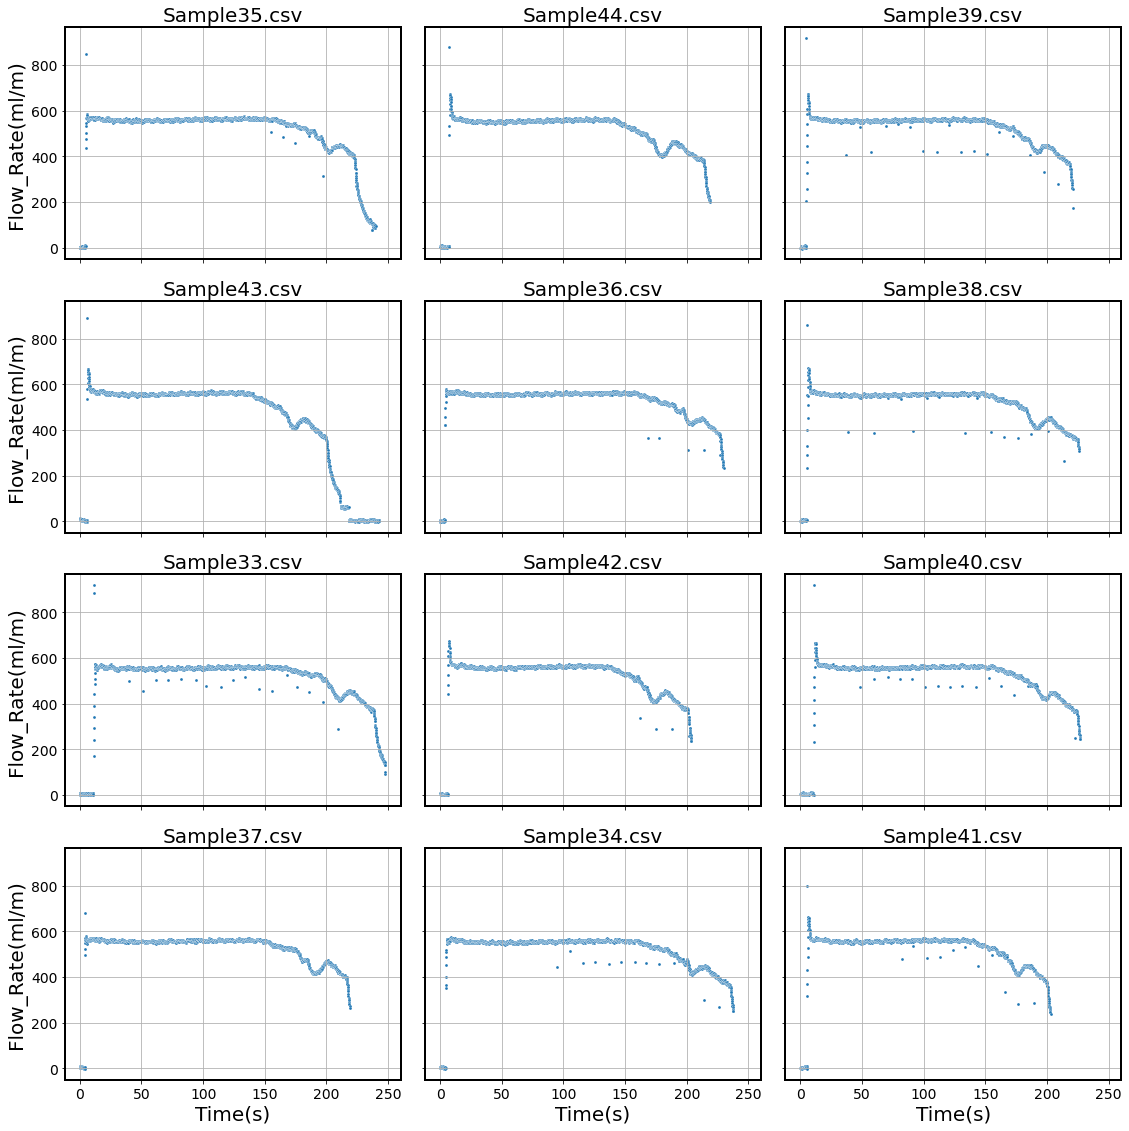

In [31]:
plot_flowRatebyTime(dataframes=large_dataframes, nrows=4, ncols=3)

As shown, we have some visible outliers in the flow rate column. Therefore, we will use the isolation forest model to remove those.

In [ ]:
df_example = large_dataframes[2]
df_reduced = df_example.drop()

In [20]:



df_path = path + '/' + file_names[2]
df = pd.read_csv(df_path,encoding='utf-8')

'./Datasets/Training/Large/Sample34.csv'

Fixing NaN values in datatable rows

In [40]:
df = fix_invalid_rows(df)
df

,Time(s),Flow_Rate(ml/m),Upstream_Pressure(psi),Downstream_Pressure(psi)
0,0.0,3.518703,0.90000,-0.00625
1,0.1,6.874955,0.97500,0.56250
2,0.2,7.960801,0.82500,0.61875
3,0.3,4.900689,0.61875,0.36875
4,0.4,5.295542,0.03125,0.16875
...,...,...,...,...
2375,237.5,261.950120,19.48750,-1.31875
2376,237.6,256.224749,19.56875,-0.96875
2377,237.7,252.572357,20.28750,-0.08125
2378,237.8,250.005811,20.43750,0.53125


Removing useless columns

In [12]:
#Pressure Drop (Upstream Pressure – Downstream Pressure)
#we identify the filter as clogged whenever the pressure drop is higher than 20 psi.

In [14]:
UP_Pessure = np.array(df['Upstream_Pressure(psi)'])
D_Pressure = np.array(df['Downstream_Pressure(psi)'])

drop_pressure = UP_Pessure-D_Pressure
drop_pressure

array([ 0.90625,  0.4125 ,  0.20625, ..., 20.36875, 19.90625, 19.39375])

In [15]:
df['pressure_drop'] = drop_pressure
px.scatter(data_frame= df, x = 'Time(s)', y = 'pressure_drop')

In [37]:
drop_pressure
pressure_threshold_index = np.where(drop_pressure > 20)[0][0]

pressure_threshold_index
times = df['Time(s)']
threshold_time = times[pressure_threshold_index]

labels = [round(threshold_time - i, 1) if (threshold_time - i) > 0 else 0 for i in times]

206.0

In [55]:
train_set = df.copy()
train_set = train_set.drop(['Flow_Rate(ml/m)', 'Upstream_Pressure(psi)','Downstream_Pressure(psi)'], axis=1)

train_set['pressure_drop'] = drop_pressure
model = tree.DecisionTreeRegressor()
model = model.fit(train_set, labels)

model.fit(train_set, labels)
train_set

#MODEL TA TRENADO

,Time(s),pressure_drop
0,0.0,0.90625
1,0.1,0.41250
2,0.2,0.20625
3,0.3,0.25000
4,0.4,-0.13750
...,...,...
2375,237.5,20.80625
2376,237.6,20.53750
2377,237.7,20.36875
2378,237.8,19.90625


In [56]:
df_path = path + '/' + file_names[3]
df_test = pd.read_csv(df_path,encoding='utf-8')
df_test


,Time(s),Flow_Rate(ml/m),Upstream_Pressure(psi),Downstream_Pressure(psi)
0,0.0,-0.627256,0.25625,-0.70000
1,0.1,5.492969,0.73125,0.59375
2,0.2,4.999402,-0.71250,-1.35000
3,0.3,5.196829,0.80625,0.62500
4,0.4,2.136717,0.66875,0.58750
...,...,...,...,...
2395,239.5,94.236225,7.93750,0.56875
2396,239.6,88.116000,7.15625,-0.61875
2397,239.7,92.952952,6.33125,-1.21250
2398,239.8,98.480897,5.55625,-1.24375


In [58]:
UP_Pessure = np.array(df_test['Upstream_Pressure(psi)'])
D_Pressure = np.array(df_test['Downstream_Pressure(psi)'])

pressure = UP_Pessure-D_Pressure

df_test = df_test.drop(['Flow_Rate(ml/m)', 'Upstream_Pressure(psi)','Downstream_Pressure(psi)'], axis =1)

df_test['pressure_drop'] = pressure
df_test

KeyError: 'Upstream_Pressure(psi)'